# **Neural Network for stock market**

## Lyha Espinosa García   IF721861
## Sean Nicolas Gonzalez Vazquez IF720083
## Moisés Flores Ortiz IF722183

## Libs

In [1]:
import pandas as pd
import pandas_datareader.data as web
import numpy as np
import matplotlib.pylab as plt
%matplotlib inline
from keras.models import Sequential
from keras.layers import Dense,Activation,Flatten
from sklearn.preprocessing import MinMaxScaler

Using TensorFlow backend.


## Data

Bienvenido a la red neuronal que predice el movimiento de las acciones de las empresas del mercado
A continuacion se muestra un menu con las opciones que tenemos disponibles para predecir
1. Apple
2. Amazon
3. Google
4. Waltmart
5. Microsoft
6. AT&T
7. IBM
8. Citi Group
9. Facebook
10 Netflix
Introduce el numero de la empresa = 7
A continuacion se muestran los datos de IBM :


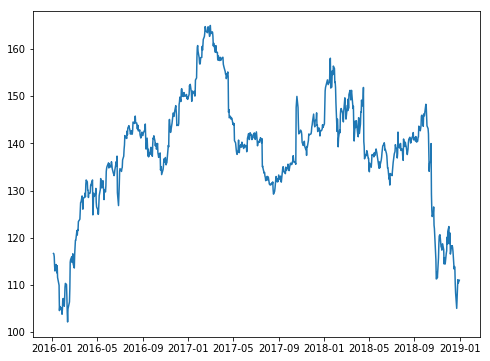

In [14]:
def get_historical_closes(ticker, start_date, end_date=None):
    closes = web.YahooDailyReader(ticker, start_date, end_date).read()
    return pd.DataFrame(closes.loc[:, 'Adj Close'])

  
#Generando diccionarios para facilitar la entrada de la empresa de la cual se quieren descargar los datos.

option = {}
option['1'] = 'AAPL' #APPLE
option['2'] = 'AMZN' #AMAZON
option['3'] = 'GOOG' #GOOGLE
option['4'] = 'WMT' #WALTMART
option['5'] = 'MSFT' #MICROSOFT
option['6'] = 'T' #AT&T
option['7'] = 'IBM' #IBM
option['8'] = 'C' #Citi Group
option['9'] = 'FB' #Facebook
option['10'] = 'NFLX' #Netflix

change = {}
change['AAPL'] = 'Apple'
change['AMZN'] = 'Amazon'
change['GOOG'] = 'Google'
change['WMT'] = 'Waltmart'
change['MSFT'] = 'Microsoft'
change['T'] = 'AT&T'
change['IBM'] = 'IBM'
change['C'] = 'Citi Group'
change['FB'] = 'Facebook'
change['NFLX'] = 'Netflix'

#Desplegando el menu para el usuario

print("Bienvenido a la red neuronal que predice el movimiento de las acciones de las empresas del mercado")
print("A continuacion se muestra un menu con las opciones que tenemos disponibles para predecir")
print("1. Apple")
print("2. Amazon")
print("3. Google")
print("4. Waltmart")
print("5. Microsoft")
print("6. AT&T")
print("7. IBM")
print("8. Citi Group")
print("9. Facebook")
print("10 Netflix")

#Definiendo la empresa de la cual se descargaran los datos

entrada = input('Introduce el numero de la empresa = ')
empresa = option.get(entrada)
name = change.get(empresa)

#Definiendo las fechas y descargando los datos de pandas

print('A continuacion se muestran los datos de',name,':')
start_date = '2016-01-01'
end_date = '2018-12-31'
data = get_historical_closes(empresa, start_date, end_date)
plt.figure(figsize = (8,6))
plt.plot(data)
plt.show()

## Series to supervised

In [4]:
#Function developed by Jason Brownlee

PASOS=200

# convert series to supervised learning
def series_to_supervised(data, n_in=1, n_out=1, dropnan=True):
    n_vars = 1 if type(data) is list else data.shape[1]
    df = pd.DataFrame(data)
    cols, names = list(), list()
    # input sequence (t-n, ... t-1)
    for i in range(n_in, 0, -1):
        cols.append(df.shift(i))
        names += [('var%d(t-%d)' % (j+1, i)) for j in range(n_vars)]
    # forecast sequence (t, t+1, ... t+n)
    for i in range(0, n_out):
        cols.append(df.shift(-i))
        if i == 0:
            names += [('var%d(t)' % (j+1)) for j in range(n_vars)]
        else:
            names += [('var%d(t+%d)' % (j+1, i)) for j in range(n_vars)]
    # put it all together
    agg = pd.concat(cols, axis=1)
    agg.columns = names
    # drop rows with NaN values
    if dropnan:
        agg.dropna(inplace=True)
    return agg
 
# load dataset
values = data.values
# ensure all data is float
values = values.astype('float32')
# normalize features
scaler = MinMaxScaler(feature_range=(-1, 1))
values=values.reshape(-1, 1) # esto lo hacemos porque tenemos 1 sola dimension
scaled = scaler.fit_transform(values)
# frame as supervised learning
reframed = series_to_supervised(scaled, PASOS, 1)
reframed.head()

,var1(t-200),var1(t-199),var1(t-198),var1(t-197),var1(t-196),var1(t-195),var1(t-194),var1(t-193),var1(t-192),var1(t-191),...,var1(t-9),var1(t-8),var1(t-7),var1(t-6),var1(t-5),var1(t-4),var1(t-3),var1(t-2),var1(t-1),var1(t)
200,-0.869304,-0.861035,-0.857143,-0.939030,-0.948597,-0.945679,-0.915518,-0.979244,-0.931733,-0.986866,...,-0.443652,-0.439274,-0.435220,-0.414951,-0.437003,-0.434247,-0.454192,-0.453219,-0.458732,-0.442030
201,-0.861035,-0.857143,-0.939030,-0.948597,-0.945679,-0.915518,-0.979244,-0.931733,-0.986866,-0.982163,...,-0.439274,-0.435220,-0.414951,-0.437003,-0.434247,-0.454192,-0.453219,-0.458732,-0.442030,-0.417059
202,-0.857143,-0.939030,-0.948597,-0.945679,-0.915518,-0.979244,-0.931733,-0.986866,-0.982163,-0.996919,...,-0.435220,-0.414951,-0.437003,-0.434247,-0.454192,-0.453219,-0.458732,-0.442030,-0.417059,-0.418842
203,-0.939030,-0.948597,-0.945679,-0.915518,-0.979244,-0.931733,-0.986866,-0.982163,-0.996919,-1.000000,...,-0.414951,-0.437003,-0.434247,-0.454192,-0.453219,-0.458732,-0.442030,-0.417059,-0.418842,-0.385276
204,-0.948597,-0.945679,-0.915518,-0.979244,-0.931733,-0.986866,-0.982163,-0.996919,-1.000000,-0.938706,...,-0.437003,-0.434247,-0.454192,-0.453219,-0.458732,-0.442030,-0.417059,-0.418842,-0.385276,-0.365656


## Split data into train and test sets

In [5]:
values = reframed.values
n_train_days = 420+140 - (30+96)
train = values[:n_train_days, :]
test = values[n_train_days:, :]
# split into input and outputs
x_train, y_train = train[:, :-1], train[:, -1]
x_v, y_v = test[:, :-1], test[:, -1]

x_train = x_train.reshape((x_train.shape[0], 1, x_train.shape[1]))
x_v = x_v.reshape((x_v.shape[0], 1, x_v.shape[1]))
print(x_train.shape, y_train.shape, x_v.shape, y_v.shape)

(434, 1, 200) (434,) (120, 1, 200) (120,)


## Neural Network

In [6]:
def Neural_own():   
    model=Sequential([
        Dense(30,input_shape=(1,PASOS)),
        Flatten(),
        Activation('tanh'),

        Dense(50),
        Activation('tanh'),


        Dense(30),
        Activation('tanh'),
        
        Dense(3),
        Activation('tanh'),

        Dense(1),
        Activation('tanh')
    ])


    model.compile(
        optimizer='Adam',
        loss='mse',
        metrics=['mse',],
    )
    history=model.fit(
        x_train,
        y_train,
        epochs=1500,
        batch_size=500,
        validation_data=(x_v,y_v)    
    )
    return model

## Train and prediction

In [7]:
model=Neural_own()
results=model.predict(x_v)

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Use tf.cast instead.
Train on 434 samples, validate on 120 samples
Epoch 1/1500
434/434 [==============================] - 2s 4ms/step - loss: 0.8692 - mean_squared_error: 0.8692 - val_loss: 0.5154 - val_mean_squared_error: 0.5154
Epoch 2/1500
434/434 [==============================] - 0s 23us/step - loss: 0.6406 - mean_squared_error: 0.6406 - val_loss: 0.3193 - val_mean_squared_error: 0.3193
Epoch 3/1500
434/434 [==============================] - 0s 18us/step - loss: 0.3725 - mean_squared_error: 0.3725 - val_loss: 0.2131 - val_mean_squared_error: 0.2131
Epoch 4/1500
434/434 [==============================] - 0s 17us/step - loss: 0.1645 - mean_squared_error: 0.1645 - val_loss: 0.2402 - val_mean_squared_error: 0.2402
Epoch 5/1500
434/434 [==============================] - 0s 53us/step - loss: 0.0702 - mean_squared_error: 0.0702 - val_loss: 0.3353 - val_mean_squared_error: 0.3353
Epoch 6/15

Epoch 47/1500
434/434 [==============================] - 0s 28us/step - loss: 0.0115 - mean_squared_error: 0.0115 - val_loss: 0.0568 - val_mean_squared_error: 0.0568
Epoch 48/1500
434/434 [==============================] - 0s 18us/step - loss: 0.0115 - mean_squared_error: 0.0115 - val_loss: 0.0534 - val_mean_squared_error: 0.0534
Epoch 49/1500
434/434 [==============================] - 0s 28us/step - loss: 0.0116 - mean_squared_error: 0.0116 - val_loss: 0.0512 - val_mean_squared_error: 0.0512
Epoch 50/1500
434/434 [==============================] - 0s 18us/step - loss: 0.0117 - mean_squared_error: 0.0117 - val_loss: 0.0502 - val_mean_squared_error: 0.0502
Epoch 51/1500
434/434 [==============================] - 0s 18us/step - loss: 0.0116 - mean_squared_error: 0.0116 - val_loss: 0.0505 - val_mean_squared_error: 0.0505
Epoch 52/1500
434/434 [==============================] - 0s 18us/step - loss: 0.0113 - mean_squared_error: 0.0113 - val_loss: 0.0519 - val_mean_squared_error: 0.0519
Epoc

Epoch 97/1500
434/434 [==============================] - 0s 28us/step - loss: 0.0053 - mean_squared_error: 0.0053 - val_loss: 0.0684 - val_mean_squared_error: 0.0684
Epoch 98/1500
434/434 [==============================] - 0s 18us/step - loss: 0.0052 - mean_squared_error: 0.0052 - val_loss: 0.0683 - val_mean_squared_error: 0.0683
Epoch 99/1500
434/434 [==============================] - 0s 18us/step - loss: 0.0052 - mean_squared_error: 0.0052 - val_loss: 0.0683 - val_mean_squared_error: 0.0683
Epoch 100/1500
434/434 [==============================] - 0s 28us/step - loss: 0.0051 - mean_squared_error: 0.0051 - val_loss: 0.0685 - val_mean_squared_error: 0.0685
Epoch 101/1500
434/434 [==============================] - 0s 28us/step - loss: 0.0051 - mean_squared_error: 0.0051 - val_loss: 0.0689 - val_mean_squared_error: 0.0689
Epoch 102/1500
434/434 [==============================] - 0s 18us/step - loss: 0.0051 - mean_squared_error: 0.0051 - val_loss: 0.0695 - val_mean_squared_error: 0.0695
E

Epoch 147/1500
434/434 [==============================] - 0s 23us/step - loss: 0.0040 - mean_squared_error: 0.0040 - val_loss: 0.0792 - val_mean_squared_error: 0.0792
Epoch 148/1500
434/434 [==============================] - 0s 18us/step - loss: 0.0040 - mean_squared_error: 0.0040 - val_loss: 0.0792 - val_mean_squared_error: 0.0792
Epoch 149/1500
434/434 [==============================] - 0s 18us/step - loss: 0.0040 - mean_squared_error: 0.0040 - val_loss: 0.0792 - val_mean_squared_error: 0.0792
Epoch 150/1500
434/434 [==============================] - 0s 18us/step - loss: 0.0039 - mean_squared_error: 0.0039 - val_loss: 0.0793 - val_mean_squared_error: 0.0793
Epoch 151/1500
434/434 [==============================] - 0s 18us/step - loss: 0.0039 - mean_squared_error: 0.0039 - val_loss: 0.0793 - val_mean_squared_error: 0.0793
Epoch 152/1500
434/434 [==============================] - 0s 37us/step - loss: 0.0039 - mean_squared_error: 0.0039 - val_loss: 0.0794 - val_mean_squared_error: 0.079

434/434 [==============================] - 0s 28us/step - loss: 0.0033 - mean_squared_error: 0.0033 - val_loss: 0.0774 - val_mean_squared_error: 0.0774
Epoch 197/1500
434/434 [==============================] - 0s 18us/step - loss: 0.0033 - mean_squared_error: 0.0033 - val_loss: 0.0774 - val_mean_squared_error: 0.0774
Epoch 198/1500
434/434 [==============================] - 0s 18us/step - loss: 0.0033 - mean_squared_error: 0.0033 - val_loss: 0.0773 - val_mean_squared_error: 0.0773
Epoch 199/1500
434/434 [==============================] - 0s 18us/step - loss: 0.0033 - mean_squared_error: 0.0033 - val_loss: 0.0772 - val_mean_squared_error: 0.0772
Epoch 200/1500
434/434 [==============================] - 0s 18us/step - loss: 0.0033 - mean_squared_error: 0.0033 - val_loss: 0.0772 - val_mean_squared_error: 0.0772
Epoch 201/1500
434/434 [==============================] - 0s 18us/step - loss: 0.0033 - mean_squared_error: 0.0033 - val_loss: 0.0771 - val_mean_squared_error: 0.0771
Epoch 202/150

Epoch 246/1500
434/434 [==============================] - 0s 28us/step - loss: 0.0028 - mean_squared_error: 0.0028 - val_loss: 0.0737 - val_mean_squared_error: 0.0737
Epoch 247/1500
434/434 [==============================] - 0s 28us/step - loss: 0.0028 - mean_squared_error: 0.0028 - val_loss: 0.0736 - val_mean_squared_error: 0.0736
Epoch 248/1500
434/434 [==============================] - 0s 23us/step - loss: 0.0028 - mean_squared_error: 0.0028 - val_loss: 0.0735 - val_mean_squared_error: 0.0735
Epoch 249/1500
434/434 [==============================] - 0s 19us/step - loss: 0.0028 - mean_squared_error: 0.0028 - val_loss: 0.0734 - val_mean_squared_error: 0.0734
Epoch 250/1500
434/434 [==============================] - 0s 19us/step - loss: 0.0028 - mean_squared_error: 0.0028 - val_loss: 0.0733 - val_mean_squared_error: 0.0733
Epoch 251/1500
434/434 [==============================] - 0s 0us/step - loss: 0.0028 - mean_squared_error: 0.0028 - val_loss: 0.0732 - val_mean_squared_error: 0.0732

434/434 [==============================] - 0s 28us/step - loss: 0.0024 - mean_squared_error: 0.0024 - val_loss: 0.0687 - val_mean_squared_error: 0.0687
Epoch 296/1500
434/434 [==============================] - 0s 18us/step - loss: 0.0024 - mean_squared_error: 0.0024 - val_loss: 0.0686 - val_mean_squared_error: 0.0686
Epoch 297/1500
434/434 [==============================] - 0s 19us/step - loss: 0.0024 - mean_squared_error: 0.0024 - val_loss: 0.0685 - val_mean_squared_error: 0.0685
Epoch 298/1500
434/434 [==============================] - 0s 19us/step - loss: 0.0024 - mean_squared_error: 0.0024 - val_loss: 0.0684 - val_mean_squared_error: 0.0684
Epoch 299/1500
434/434 [==============================] - 0s 5us/step - loss: 0.0024 - mean_squared_error: 0.0024 - val_loss: 0.0683 - val_mean_squared_error: 0.0683
Epoch 300/1500
434/434 [==============================] - 0s 33us/step - loss: 0.0024 - mean_squared_error: 0.0024 - val_loss: 0.0682 - val_mean_squared_error: 0.0682
Epoch 301/1500

Epoch 345/1500
434/434 [==============================] - 0s 18us/step - loss: 0.0021 - mean_squared_error: 0.0021 - val_loss: 0.0632 - val_mean_squared_error: 0.0632
Epoch 346/1500
434/434 [==============================] - 0s 18us/step - loss: 0.0021 - mean_squared_error: 0.0021 - val_loss: 0.0631 - val_mean_squared_error: 0.0631
Epoch 347/1500
434/434 [==============================] - 0s 18us/step - loss: 0.0021 - mean_squared_error: 0.0021 - val_loss: 0.0630 - val_mean_squared_error: 0.0630
Epoch 348/1500
434/434 [==============================] - 0s 18us/step - loss: 0.0021 - mean_squared_error: 0.0021 - val_loss: 0.0629 - val_mean_squared_error: 0.0629
Epoch 349/1500
434/434 [==============================] - 0s 18us/step - loss: 0.0021 - mean_squared_error: 0.0021 - val_loss: 0.0628 - val_mean_squared_error: 0.0628
Epoch 350/1500
434/434 [==============================] - 0s 14us/step - loss: 0.0021 - mean_squared_error: 0.0021 - val_loss: 0.0627 - val_mean_squared_error: 0.062

Epoch 395/1500
434/434 [==============================] - 0s 18us/step - loss: 0.0019 - mean_squared_error: 0.0019 - val_loss: 0.0580 - val_mean_squared_error: 0.0580
Epoch 396/1500
434/434 [==============================] - 0s 9us/step - loss: 0.0019 - mean_squared_error: 0.0019 - val_loss: 0.0579 - val_mean_squared_error: 0.0579
Epoch 397/1500
434/434 [==============================] - 0s 16us/step - loss: 0.0019 - mean_squared_error: 0.0019 - val_loss: 0.0578 - val_mean_squared_error: 0.0578
Epoch 398/1500
434/434 [==============================] - 0s 18us/step - loss: 0.0019 - mean_squared_error: 0.0019 - val_loss: 0.0577 - val_mean_squared_error: 0.0577
Epoch 399/1500
434/434 [==============================] - 0s 18us/step - loss: 0.0019 - mean_squared_error: 0.0019 - val_loss: 0.0576 - val_mean_squared_error: 0.0576
Epoch 400/1500
434/434 [==============================] - 0s 18us/step - loss: 0.0019 - mean_squared_error: 0.0019 - val_loss: 0.0575 - val_mean_squared_error: 0.0575

434/434 [==============================] - 0s 22us/step - loss: 0.0017 - mean_squared_error: 0.0017 - val_loss: 0.0533 - val_mean_squared_error: 0.0533
Epoch 445/1500
434/434 [==============================] - 0s 18us/step - loss: 0.0017 - mean_squared_error: 0.0017 - val_loss: 0.0533 - val_mean_squared_error: 0.0533
Epoch 446/1500
434/434 [==============================] - 0s 28us/step - loss: 0.0017 - mean_squared_error: 0.0017 - val_loss: 0.0532 - val_mean_squared_error: 0.0532
Epoch 447/1500
434/434 [==============================] - 0s 18us/step - loss: 0.0017 - mean_squared_error: 0.0017 - val_loss: 0.0531 - val_mean_squared_error: 0.0531
Epoch 448/1500
434/434 [==============================] - 0s 28us/step - loss: 0.0017 - mean_squared_error: 0.0017 - val_loss: 0.0530 - val_mean_squared_error: 0.0530
Epoch 449/1500
434/434 [==============================] - 0s 28us/step - loss: 0.0017 - mean_squared_error: 0.0017 - val_loss: 0.0529 - val_mean_squared_error: 0.0529
Epoch 450/150

Epoch 494/1500
434/434 [==============================] - 0s 18us/step - loss: 0.0016 - mean_squared_error: 0.0016 - val_loss: 0.0493 - val_mean_squared_error: 0.0493
Epoch 495/1500
434/434 [==============================] - 0s 28us/step - loss: 0.0016 - mean_squared_error: 0.0016 - val_loss: 0.0492 - val_mean_squared_error: 0.0492
Epoch 496/1500
434/434 [==============================] - 0s 28us/step - loss: 0.0016 - mean_squared_error: 0.0016 - val_loss: 0.0491 - val_mean_squared_error: 0.0491
Epoch 497/1500
434/434 [==============================] - 0s 18us/step - loss: 0.0016 - mean_squared_error: 0.0016 - val_loss: 0.0491 - val_mean_squared_error: 0.0491
Epoch 498/1500
434/434 [==============================] - 0s 18us/step - loss: 0.0016 - mean_squared_error: 0.0016 - val_loss: 0.0490 - val_mean_squared_error: 0.0490
Epoch 499/1500
434/434 [==============================] - 0s 18us/step - loss: 0.0016 - mean_squared_error: 0.0016 - val_loss: 0.0489 - val_mean_squared_error: 0.048

Epoch 544/1500
434/434 [==============================] - 0s 28us/step - loss: 0.0015 - mean_squared_error: 0.0015 - val_loss: 0.0460 - val_mean_squared_error: 0.0460
Epoch 545/1500
434/434 [==============================] - 0s 18us/step - loss: 0.0015 - mean_squared_error: 0.0015 - val_loss: 0.0459 - val_mean_squared_error: 0.0459
Epoch 546/1500
434/434 [==============================] - 0s 23us/step - loss: 0.0015 - mean_squared_error: 0.0015 - val_loss: 0.0459 - val_mean_squared_error: 0.0459
Epoch 547/1500
434/434 [==============================] - 0s 19us/step - loss: 0.0015 - mean_squared_error: 0.0015 - val_loss: 0.0458 - val_mean_squared_error: 0.0458
Epoch 548/1500
434/434 [==============================] - 0s 19us/step - loss: 0.0015 - mean_squared_error: 0.0015 - val_loss: 0.0458 - val_mean_squared_error: 0.0458
Epoch 549/1500
434/434 [==============================] - 0s 5us/step - loss: 0.0015 - mean_squared_error: 0.0015 - val_loss: 0.0457 - val_mean_squared_error: 0.0457

434/434 [==============================] - 0s 18us/step - loss: 0.0014 - mean_squared_error: 0.0014 - val_loss: 0.0435 - val_mean_squared_error: 0.0435
Epoch 594/1500
434/434 [==============================] - 0s 18us/step - loss: 0.0014 - mean_squared_error: 0.0014 - val_loss: 0.0435 - val_mean_squared_error: 0.0435
Epoch 595/1500
434/434 [==============================] - 0s 18us/step - loss: 0.0014 - mean_squared_error: 0.0014 - val_loss: 0.0434 - val_mean_squared_error: 0.0434
Epoch 596/1500
434/434 [==============================] - 0s 18us/step - loss: 0.0014 - mean_squared_error: 0.0014 - val_loss: 0.0434 - val_mean_squared_error: 0.0434
Epoch 597/1500
434/434 [==============================] - 0s 18us/step - loss: 0.0014 - mean_squared_error: 0.0014 - val_loss: 0.0433 - val_mean_squared_error: 0.0433
Epoch 598/1500
434/434 [==============================] - 0s 28us/step - loss: 0.0014 - mean_squared_error: 0.0014 - val_loss: 0.0433 - val_mean_squared_error: 0.0433
Epoch 599/150

Epoch 643/1500
434/434 [==============================] - 0s 18us/step - loss: 0.0013 - mean_squared_error: 0.0013 - val_loss: 0.0415 - val_mean_squared_error: 0.0415
Epoch 644/1500
434/434 [==============================] - 0s 18us/step - loss: 0.0013 - mean_squared_error: 0.0013 - val_loss: 0.0415 - val_mean_squared_error: 0.0415
Epoch 645/1500
434/434 [==============================] - 0s 28us/step - loss: 0.0013 - mean_squared_error: 0.0013 - val_loss: 0.0415 - val_mean_squared_error: 0.0415
Epoch 646/1500
434/434 [==============================] - 0s 19us/step - loss: 0.0013 - mean_squared_error: 0.0013 - val_loss: 0.0414 - val_mean_squared_error: 0.0414
Epoch 647/1500
434/434 [==============================] - 0s 5us/step - loss: 0.0013 - mean_squared_error: 0.0013 - val_loss: 0.0414 - val_mean_squared_error: 0.0414
Epoch 648/1500
434/434 [==============================] - 0s 23us/step - loss: 0.0013 - mean_squared_error: 0.0013 - val_loss: 0.0414 - val_mean_squared_error: 0.0414

Epoch 693/1500
434/434 [==============================] - 0s 18us/step - loss: 0.0013 - mean_squared_error: 0.0013 - val_loss: 0.0400 - val_mean_squared_error: 0.0400
Epoch 694/1500
434/434 [==============================] - 0s 18us/step - loss: 0.0013 - mean_squared_error: 0.0013 - val_loss: 0.0400 - val_mean_squared_error: 0.0400
Epoch 695/1500
434/434 [==============================] - 0s 18us/step - loss: 0.0013 - mean_squared_error: 0.0013 - val_loss: 0.0400 - val_mean_squared_error: 0.0400
Epoch 696/1500
434/434 [==============================] - 0s 28us/step - loss: 0.0013 - mean_squared_error: 0.0013 - val_loss: 0.0399 - val_mean_squared_error: 0.0399
Epoch 697/1500
434/434 [==============================] - 0s 18us/step - loss: 0.0013 - mean_squared_error: 0.0013 - val_loss: 0.0399 - val_mean_squared_error: 0.0399
Epoch 698/1500
434/434 [==============================] - 0s 18us/step - loss: 0.0013 - mean_squared_error: 0.0013 - val_loss: 0.0399 - val_mean_squared_error: 0.039

Epoch 743/1500
434/434 [==============================] - 0s 18us/step - loss: 0.0012 - mean_squared_error: 0.0012 - val_loss: 0.0389 - val_mean_squared_error: 0.0389
Epoch 744/1500
434/434 [==============================] - 0s 18us/step - loss: 0.0012 - mean_squared_error: 0.0012 - val_loss: 0.0389 - val_mean_squared_error: 0.0389
Epoch 745/1500
434/434 [==============================] - 0s 18us/step - loss: 0.0012 - mean_squared_error: 0.0012 - val_loss: 0.0388 - val_mean_squared_error: 0.0388
Epoch 746/1500
434/434 [==============================] - 0s 18us/step - loss: 0.0012 - mean_squared_error: 0.0012 - val_loss: 0.0388 - val_mean_squared_error: 0.0388
Epoch 747/1500
434/434 [==============================] - 0s 18us/step - loss: 0.0012 - mean_squared_error: 0.0012 - val_loss: 0.0388 - val_mean_squared_error: 0.0388
Epoch 748/1500
434/434 [==============================] - 0s 38us/step - loss: 0.0012 - mean_squared_error: 0.0012 - val_loss: 0.0388 - val_mean_squared_error: 0.038

Epoch 793/1500
434/434 [==============================] - 0s 0us/step - loss: 0.0012 - mean_squared_error: 0.0012 - val_loss: 0.0380 - val_mean_squared_error: 0.0380
Epoch 794/1500
434/434 [==============================] - 0s 5us/step - loss: 0.0012 - mean_squared_error: 0.0012 - val_loss: 0.0380 - val_mean_squared_error: 0.0380
Epoch 795/1500
434/434 [==============================] - 0s 46us/step - loss: 0.0012 - mean_squared_error: 0.0012 - val_loss: 0.0380 - val_mean_squared_error: 0.0380
Epoch 796/1500
434/434 [==============================] - 0s 18us/step - loss: 0.0012 - mean_squared_error: 0.0012 - val_loss: 0.0380 - val_mean_squared_error: 0.0380
Epoch 797/1500
434/434 [==============================] - 0s 18us/step - loss: 0.0012 - mean_squared_error: 0.0012 - val_loss: 0.0379 - val_mean_squared_error: 0.0379
Epoch 798/1500
434/434 [==============================] - 0s 18us/step - loss: 0.0012 - mean_squared_error: 0.0012 - val_loss: 0.0379 - val_mean_squared_error: 0.0379


Epoch 843/1500
434/434 [==============================] - 0s 28us/step - loss: 0.0011 - mean_squared_error: 0.0011 - val_loss: 0.0373 - val_mean_squared_error: 0.0373
Epoch 844/1500
434/434 [==============================] - 0s 18us/step - loss: 0.0011 - mean_squared_error: 0.0011 - val_loss: 0.0373 - val_mean_squared_error: 0.0373
Epoch 845/1500
434/434 [==============================] - 0s 28us/step - loss: 0.0011 - mean_squared_error: 0.0011 - val_loss: 0.0373 - val_mean_squared_error: 0.0373
Epoch 846/1500
434/434 [==============================] - 0s 9us/step - loss: 0.0011 - mean_squared_error: 0.0011 - val_loss: 0.0373 - val_mean_squared_error: 0.0373
Epoch 847/1500
434/434 [==============================] - 0s 23us/step - loss: 0.0011 - mean_squared_error: 0.0011 - val_loss: 0.0373 - val_mean_squared_error: 0.0373
Epoch 848/1500
434/434 [==============================] - 0s 23us/step - loss: 0.0011 - mean_squared_error: 0.0011 - val_loss: 0.0373 - val_mean_squared_error: 0.0373

Epoch 893/1500
434/434 [==============================] - 0s 18us/step - loss: 0.0011 - mean_squared_error: 0.0011 - val_loss: 0.0368 - val_mean_squared_error: 0.0368
Epoch 894/1500
434/434 [==============================] - 0s 18us/step - loss: 0.0011 - mean_squared_error: 0.0011 - val_loss: 0.0368 - val_mean_squared_error: 0.0368
Epoch 895/1500
434/434 [==============================] - 0s 18us/step - loss: 0.0011 - mean_squared_error: 0.0011 - val_loss: 0.0368 - val_mean_squared_error: 0.0368
Epoch 896/1500
434/434 [==============================] - 0s 18us/step - loss: 0.0011 - mean_squared_error: 0.0011 - val_loss: 0.0368 - val_mean_squared_error: 0.0368
Epoch 897/1500
434/434 [==============================] - 0s 18us/step - loss: 0.0011 - mean_squared_error: 0.0011 - val_loss: 0.0368 - val_mean_squared_error: 0.0368
Epoch 898/1500
434/434 [==============================] - 0s 26us/step - loss: 0.0011 - mean_squared_error: 0.0011 - val_loss: 0.0368 - val_mean_squared_error: 0.036

Epoch 943/1500
434/434 [==============================] - 0s 18us/step - loss: 0.0010 - mean_squared_error: 0.0010 - val_loss: 0.0365 - val_mean_squared_error: 0.0365
Epoch 944/1500
434/434 [==============================] - 0s 18us/step - loss: 0.0010 - mean_squared_error: 0.0010 - val_loss: 0.0365 - val_mean_squared_error: 0.0365
Epoch 945/1500
434/434 [==============================] - 0s 18us/step - loss: 0.0010 - mean_squared_error: 0.0010 - val_loss: 0.0365 - val_mean_squared_error: 0.0365
Epoch 946/1500
434/434 [==============================] - 0s 18us/step - loss: 0.0010 - mean_squared_error: 0.0010 - val_loss: 0.0365 - val_mean_squared_error: 0.0365
Epoch 947/1500
434/434 [==============================] - 0s 18us/step - loss: 0.0010 - mean_squared_error: 0.0010 - val_loss: 0.0364 - val_mean_squared_error: 0.0364
Epoch 948/1500
434/434 [==============================] - 0s 41us/step - loss: 0.0010 - mean_squared_error: 0.0010 - val_loss: 0.0365 - val_mean_squared_error: 0.036

Epoch 993/1500
434/434 [==============================] - 0s 18us/step - loss: 0.0010 - mean_squared_error: 0.0010 - val_loss: 0.0366 - val_mean_squared_error: 0.0366
Epoch 994/1500
434/434 [==============================] - 0s 9us/step - loss: 0.0010 - mean_squared_error: 0.0010 - val_loss: 0.0357 - val_mean_squared_error: 0.0357
Epoch 995/1500
434/434 [==============================] - 0s 18us/step - loss: 0.0010 - mean_squared_error: 0.0010 - val_loss: 0.0368 - val_mean_squared_error: 0.0368
Epoch 996/1500
434/434 [==============================] - 0s 28us/step - loss: 0.0010 - mean_squared_error: 0.0010 - val_loss: 0.0361 - val_mean_squared_error: 0.0361
Epoch 997/1500
434/434 [==============================] - 0s 18us/step - loss: 0.0010 - mean_squared_error: 0.0010 - val_loss: 0.0361 - val_mean_squared_error: 0.0361
Epoch 998/1500
434/434 [==============================] - 0s 28us/step - loss: 0.0010 - mean_squared_error: 0.0010 - val_loss: 0.0367 - val_mean_squared_error: 0.0367

Epoch 1041/1500
434/434 [==============================] - 0s 18us/step - loss: 9.7512e-04 - mean_squared_error: 9.7512e-04 - val_loss: 0.0361 - val_mean_squared_error: 0.0361
Epoch 1042/1500
434/434 [==============================] - 0s 18us/step - loss: 9.7451e-04 - mean_squared_error: 9.7451e-04 - val_loss: 0.0360 - val_mean_squared_error: 0.0360
Epoch 1043/1500
434/434 [==============================] - 0s 9us/step - loss: 9.7386e-04 - mean_squared_error: 9.7386e-04 - val_loss: 0.0361 - val_mean_squared_error: 0.0361
Epoch 1044/1500
434/434 [==============================] - 0s 18us/step - loss: 9.7323e-04 - mean_squared_error: 9.7323e-04 - val_loss: 0.0361 - val_mean_squared_error: 0.0361
Epoch 1045/1500
434/434 [==============================] - 0s 5us/step - loss: 9.7263e-04 - mean_squared_error: 9.7263e-04 - val_loss: 0.0360 - val_mean_squared_error: 0.0360
Epoch 1046/1500
434/434 [==============================] - 0s 23us/step - loss: 9.7205e-04 - mean_squared_error: 9.7205e-0

Epoch 1088/1500
434/434 [==============================] - 0s 5us/step - loss: 9.4705e-04 - mean_squared_error: 9.4705e-04 - val_loss: 0.0359 - val_mean_squared_error: 0.0359
Epoch 1089/1500
434/434 [==============================] - 0s 28us/step - loss: 9.4646e-04 - mean_squared_error: 9.4646e-04 - val_loss: 0.0359 - val_mean_squared_error: 0.0359
Epoch 1090/1500
434/434 [==============================] - 0s 18us/step - loss: 9.4588e-04 - mean_squared_error: 9.4588e-04 - val_loss: 0.0359 - val_mean_squared_error: 0.0359
Epoch 1091/1500
434/434 [==============================] - 0s 18us/step - loss: 9.4530e-04 - mean_squared_error: 9.4530e-04 - val_loss: 0.0359 - val_mean_squared_error: 0.0359
Epoch 1092/1500
434/434 [==============================] - 0s 18us/step - loss: 9.4472e-04 - mean_squared_error: 9.4472e-04 - val_loss: 0.0359 - val_mean_squared_error: 0.0359
Epoch 1093/1500
434/434 [==============================] - 0s 18us/step - loss: 9.4413e-04 - mean_squared_error: 9.4413e-

Epoch 1135/1500
434/434 [==============================] - 0s 28us/step - loss: 9.2013e-04 - mean_squared_error: 9.2013e-04 - val_loss: 0.0358 - val_mean_squared_error: 0.0358
Epoch 1136/1500
434/434 [==============================] - 0s 18us/step - loss: 9.1956e-04 - mean_squared_error: 9.1956e-04 - val_loss: 0.0358 - val_mean_squared_error: 0.0358
Epoch 1137/1500
434/434 [==============================] - 0s 18us/step - loss: 9.1900e-04 - mean_squared_error: 9.1900e-04 - val_loss: 0.0358 - val_mean_squared_error: 0.0358
Epoch 1138/1500
434/434 [==============================] - 0s 28us/step - loss: 9.1844e-04 - mean_squared_error: 9.1844e-04 - val_loss: 0.0358 - val_mean_squared_error: 0.0358
Epoch 1139/1500
434/434 [==============================] - 0s 32us/step - loss: 9.1788e-04 - mean_squared_error: 9.1788e-04 - val_loss: 0.0358 - val_mean_squared_error: 0.0358
Epoch 1140/1500
434/434 [==============================] - 0s 32us/step - loss: 9.1732e-04 - mean_squared_error: 9.1732e

Epoch 1182/1500
434/434 [==============================] - 0s 69us/step - loss: 9.6147e-04 - mean_squared_error: 9.6147e-04 - val_loss: 0.0380 - val_mean_squared_error: 0.0380
Epoch 1183/1500
434/434 [==============================] - 0s 18us/step - loss: 9.8112e-04 - mean_squared_error: 9.8112e-04 - val_loss: 0.0345 - val_mean_squared_error: 0.0345
Epoch 1184/1500
434/434 [==============================] - 0s 18us/step - loss: 9.3252e-04 - mean_squared_error: 9.3252e-04 - val_loss: 0.0360 - val_mean_squared_error: 0.0360
Epoch 1185/1500
434/434 [==============================] - 0s 18us/step - loss: 8.9421e-04 - mean_squared_error: 8.9421e-04 - val_loss: 0.0369 - val_mean_squared_error: 0.0369
Epoch 1186/1500
434/434 [==============================] - 0s 18us/step - loss: 9.1379e-04 - mean_squared_error: 9.1379e-04 - val_loss: 0.0343 - val_mean_squared_error: 0.0343
Epoch 1187/1500
434/434 [==============================] - 0s 19us/step - loss: 9.4452e-04 - mean_squared_error: 9.4452e

Epoch 1229/1500
434/434 [==============================] - 0s 28us/step - loss: 8.7336e-04 - mean_squared_error: 8.7336e-04 - val_loss: 0.0357 - val_mean_squared_error: 0.0357
Epoch 1230/1500
434/434 [==============================] - 0s 18us/step - loss: 8.7241e-04 - mean_squared_error: 8.7241e-04 - val_loss: 0.0358 - val_mean_squared_error: 0.0358
Epoch 1231/1500
434/434 [==============================] - 0s 18us/step - loss: 8.7176e-04 - mean_squared_error: 8.7176e-04 - val_loss: 0.0359 - val_mean_squared_error: 0.0359
Epoch 1232/1500
434/434 [==============================] - 0s 18us/step - loss: 8.7154e-04 - mean_squared_error: 8.7154e-04 - val_loss: 0.0356 - val_mean_squared_error: 0.0356
Epoch 1233/1500
434/434 [==============================] - 0s 28us/step - loss: 8.7131e-04 - mean_squared_error: 8.7131e-04 - val_loss: 0.0359 - val_mean_squared_error: 0.0359
Epoch 1234/1500
434/434 [==============================] - 0s 28us/step - loss: 8.7074e-04 - mean_squared_error: 8.7074e

Epoch 1276/1500
434/434 [==============================] - 0s 18us/step - loss: 8.5078e-04 - mean_squared_error: 8.5078e-04 - val_loss: 0.0357 - val_mean_squared_error: 0.0357
Epoch 1277/1500
434/434 [==============================] - 0s 18us/step - loss: 8.5032e-04 - mean_squared_error: 8.5032e-04 - val_loss: 0.0357 - val_mean_squared_error: 0.0357
Epoch 1278/1500
434/434 [==============================] - 0s 28us/step - loss: 8.4987e-04 - mean_squared_error: 8.4987e-04 - val_loss: 0.0357 - val_mean_squared_error: 0.0357
Epoch 1279/1500
434/434 [==============================] - 0s 18us/step - loss: 8.4941e-04 - mean_squared_error: 8.4941e-04 - val_loss: 0.0357 - val_mean_squared_error: 0.0357
Epoch 1280/1500
434/434 [==============================] - 0s 18us/step - loss: 8.4895e-04 - mean_squared_error: 8.4895e-04 - val_loss: 0.0357 - val_mean_squared_error: 0.0357
Epoch 1281/1500
434/434 [==============================] - 0s 28us/step - loss: 8.4849e-04 - mean_squared_error: 8.4849e

Epoch 1323/1500
434/434 [==============================] - 0s 37us/step - loss: 8.2942e-04 - mean_squared_error: 8.2942e-04 - val_loss: 0.0357 - val_mean_squared_error: 0.0357
Epoch 1324/1500
434/434 [==============================] - 0s 28us/step - loss: 8.2898e-04 - mean_squared_error: 8.2898e-04 - val_loss: 0.0357 - val_mean_squared_error: 0.0357
Epoch 1325/1500
434/434 [==============================] - 0s 28us/step - loss: 8.2853e-04 - mean_squared_error: 8.2853e-04 - val_loss: 0.0357 - val_mean_squared_error: 0.0357
Epoch 1326/1500
434/434 [==============================] - 0s 18us/step - loss: 8.2808e-04 - mean_squared_error: 8.2808e-04 - val_loss: 0.0357 - val_mean_squared_error: 0.0357
Epoch 1327/1500
434/434 [==============================] - 0s 18us/step - loss: 8.2763e-04 - mean_squared_error: 8.2763e-04 - val_loss: 0.0357 - val_mean_squared_error: 0.0357
Epoch 1328/1500
434/434 [==============================] - 0s 28us/step - loss: 8.2718e-04 - mean_squared_error: 8.2718e

Epoch 1370/1500
434/434 [==============================] - 0s 18us/step - loss: 8.0872e-04 - mean_squared_error: 8.0872e-04 - val_loss: 0.0358 - val_mean_squared_error: 0.0358
Epoch 1371/1500
434/434 [==============================] - 0s 18us/step - loss: 8.0842e-04 - mean_squared_error: 8.0842e-04 - val_loss: 0.0355 - val_mean_squared_error: 0.0355
Epoch 1372/1500
434/434 [==============================] - 0s 18us/step - loss: 8.0824e-04 - mean_squared_error: 8.0824e-04 - val_loss: 0.0359 - val_mean_squared_error: 0.0359
Epoch 1373/1500
434/434 [==============================] - 0s 18us/step - loss: 8.0831e-04 - mean_squared_error: 8.0831e-04 - val_loss: 0.0353 - val_mean_squared_error: 0.0353
Epoch 1374/1500
434/434 [==============================] - 0s 18us/step - loss: 8.0883e-04 - mean_squared_error: 8.0883e-04 - val_loss: 0.0361 - val_mean_squared_error: 0.0361
Epoch 1375/1500
434/434 [==============================] - 0s 37us/step - loss: 8.1025e-04 - mean_squared_error: 8.1025e

Epoch 1417/1500
434/434 [==============================] - 0s 28us/step - loss: 7.9112e-04 - mean_squared_error: 7.9112e-04 - val_loss: 0.0355 - val_mean_squared_error: 0.0355
Epoch 1418/1500
434/434 [==============================] - 0s 18us/step - loss: 7.9395e-04 - mean_squared_error: 7.9395e-04 - val_loss: 0.0367 - val_mean_squared_error: 0.0367
Epoch 1419/1500
434/434 [==============================] - 0s 18us/step - loss: 8.0000e-04 - mean_squared_error: 8.0000e-04 - val_loss: 0.0353 - val_mean_squared_error: 0.0353
Epoch 1420/1500
434/434 [==============================] - 0s 18us/step - loss: 7.9702e-04 - mean_squared_error: 7.9702e-04 - val_loss: 0.0362 - val_mean_squared_error: 0.0362
Epoch 1421/1500
434/434 [==============================] - 0s 18us/step - loss: 7.9018e-04 - mean_squared_error: 7.9018e-04 - val_loss: 0.0362 - val_mean_squared_error: 0.0362
Epoch 1422/1500
434/434 [==============================] - 0s 18us/step - loss: 7.8994e-04 - mean_squared_error: 7.8994e

Epoch 1464/1500
434/434 [==============================] - 0s 18us/step - loss: 7.7265e-04 - mean_squared_error: 7.7265e-04 - val_loss: 0.0358 - val_mean_squared_error: 0.0358
Epoch 1465/1500
434/434 [==============================] - 0s 28us/step - loss: 7.7233e-04 - mean_squared_error: 7.7233e-04 - val_loss: 0.0357 - val_mean_squared_error: 0.0357
Epoch 1466/1500
434/434 [==============================] - 0s 18us/step - loss: 7.7198e-04 - mean_squared_error: 7.7198e-04 - val_loss: 0.0358 - val_mean_squared_error: 0.0358
Epoch 1467/1500
434/434 [==============================] - 0s 18us/step - loss: 7.7157e-04 - mean_squared_error: 7.7157e-04 - val_loss: 0.0357 - val_mean_squared_error: 0.0357
Epoch 1468/1500
434/434 [==============================] - 0s 18us/step - loss: 7.7114e-04 - mean_squared_error: 7.7114e-04 - val_loss: 0.0357 - val_mean_squared_error: 0.0357
Epoch 1469/1500
434/434 [==============================] - 0s 18us/step - loss: 7.7076e-04 - mean_squared_error: 7.7076e

## Test Results 

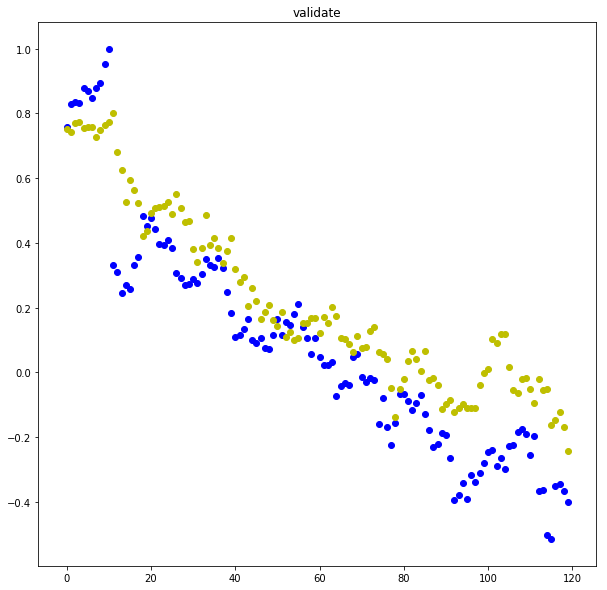

In [8]:
plt.figure(figsize=(10,10))
plt.scatter(range(len(y_v)),y_v,c='b')
plt.scatter(range(len(results)),results,c='y')
plt.title('validate')
plt.show()

## Go back to real data

In [9]:
#Rescale output
results=scaler.inverse_transform(results)
print(results)

[[202.28116]
 [201.72052]
 [203.27818]
 [203.57664]
 [202.37096]
 [202.56653]
 [202.62582]
 [200.71907]
 [202.04901]
 [202.88405]
 [203.51619]
 [205.18251]
 [197.91211]
 [194.47894]
 [188.21667]
 [192.58316]
 [190.57005]
 [188.20529]
 [181.75761]
 [182.75513]
 [186.2181 ]
 [187.21709]
 [187.34859]
 [187.52809]
 [188.23271]
 [186.00015]
 [189.81956]
 [187.16461]
 [184.5032 ]
 [184.6809 ]
 [179.32797]
 [176.9506 ]
 [179.53055]
 [185.85605]
 [180.16849]
 [181.44987]
 [179.48154]
 [176.6051 ]
 [178.88033]
 [181.4581 ]
 [175.45174]
 [173.09885]
 [174.08153]
 [168.44962]
 [171.98128]
 [169.36815]
 [165.97064]
 [167.30795]
 [168.73637]
 [165.86432]
 [164.71915]
 [167.26038]
 [162.61215]
 [163.5431 ]
 [161.96007]
 [162.33739]
 [165.28447]
 [165.27036]
 [166.27876]
 [166.27849]
 [163.41626]
 [166.36543]
 [165.19688]
 [168.35284]
 [166.51582]
 [162.45816]
 [162.15689]
 [161.33981]
 [159.68419]
 [162.82077]
 [160.58781]
 [160.6143 ]
 [163.64781]
 [164.42552]
 [159.67815]
 [159.29877]
 [158.40106]

In [10]:
# Rescale validation
y_v=y_v.reshape(-1,1)
y_v=scaler.inverse_transform(y_v)
print(y_v)

[[202.54   ]
 [206.92   ]
 [207.32   ]
 [207.23   ]
 [209.99   ]
 [209.36   ]
 [208.09   ]
 [209.94   ]
 [210.91   ]
 [214.67   ]
 [217.5    ]
 [176.26   ]
 [174.89   ]
 [171.06   ]
 [172.58   ]
 [171.65   ]
 [176.37   ]
 [177.78   ]
 [185.69   ]
 [183.81   ]
 [185.18   ]
 [183.09   ]
 [180.26   ]
 [180.05   ]
 [181.11   ]
 [179.53   ]
 [174.7    ]
 [173.8    ]
 [172.5    ]
 [172.62   ]
 [173.64   ]
 [172.9    ]
 [174.65   ]
 [177.46   ]
 [176.26   ]
 [175.9    ]
 [177.64   ]
 [175.73   ]
 [171.16   ]
 [167.18   ]
 [162.53   ]
 [163.04   ]
 [164.18   ]
 [165.94   ]
 [162.     ]
 [161.36   ]
 [162.32   ]
 [160.58   ]
 [160.3    ]
 [163.06   ]
 [166.02   ]
 [162.93   ]
 [165.41   ]
 [164.91   ]
 [166.95   ]
 [168.84   ]
 [164.46   ]
 [162.44   ]
 [159.33   ]
 [162.43   ]
 [158.85   ]
 [157.33   ]
 [157.25   ]
 [157.9    ]
 [151.38   ]
 [153.35   ]
 [153.74   ]
 [153.52   ]
 [158.78   ]
 [159.42   ]
 [154.92   ]
 [154.05   ]
 [154.78   ]
 [154.39   ]
 [146.04   ]
 [150.95   ]
 [145.37   ]

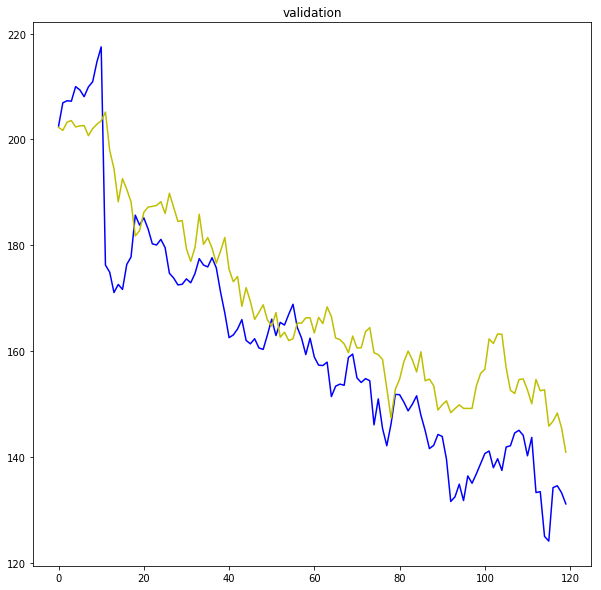

In [11]:
plt.figure(figsize=(10,10))
plt.plot(range(len(y_v)),y_v,'b')
plt.plot(range(len(results)),results,'y')
plt.title('validation')
plt.show()